In [1]:
#Here we give a demonstration of using inset_axes to zoom in and highlight bits of a graph
#We'll also combine this with a different type of polar projection, hammer. Think of like how we show the 
#map of the Earth. inset_axes is especially useful here because of how data/countries at the poles get distorted

#Usual 3 imports you'd need. 
#%matplotlib inline simply makes sure figures are rendered properly in a notebook
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

#This import is just for showing the inset_axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

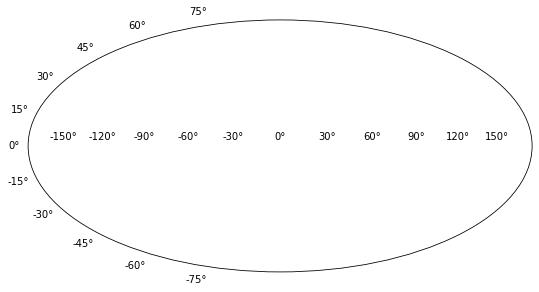

In [8]:
pfig = plt.figure(1)
pfig.set_size_inches((10, 5))
proj1 = pfig.add_axes([0.05,0.05,0.7,0.9], projection='hammer')

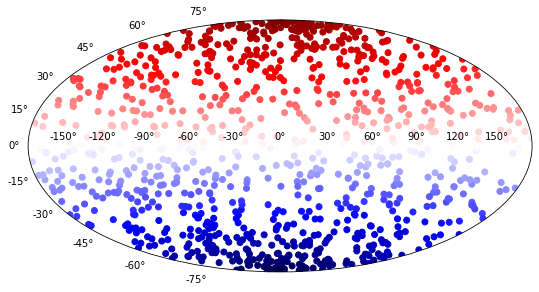

In [9]:
#Here we just generate some random data. Bear in mind though that the data cover the following range with hammer
#Longitude/X: -180 to 180 degrees/-pi to pi radians
#Latitude/Y: -90 to 90 degrees/-0.5pi to 0.5pi radians

#Also, while standard polar accepts degrees when plotting, hammer by default needs radians
dat1 = np.radians(np.random.rand(1000)*360-180)
dat2 = np.radians(np.random.rand(1000)*180-90)
proj1.scatter(dat1,dat2,c=dat2,cmap='seismic')
pfig

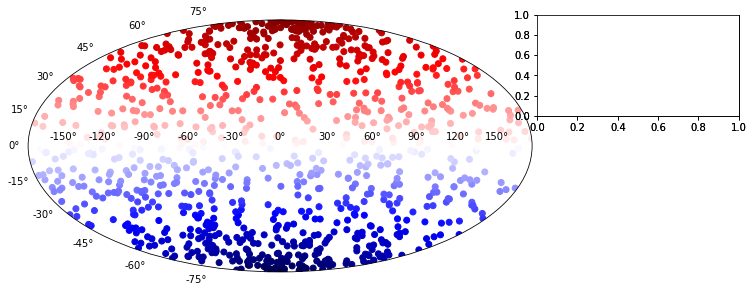

In [11]:
#
proj1Z = inset_axes(proj1, #axes reference 
                    "40%", "40%", #Effectively how big the axes is, relative to the original axes
                    #Not that doesn't affect the actual range it covers, data-wise
                    loc='lower left',bbox_to_anchor=[1,0.6,1,1], #Where to put the new axes.
                    #The bound box, transformed below basically means it'll be on the top half, right of the axes
                    bbox_transform=proj1.transAxes)
pfig

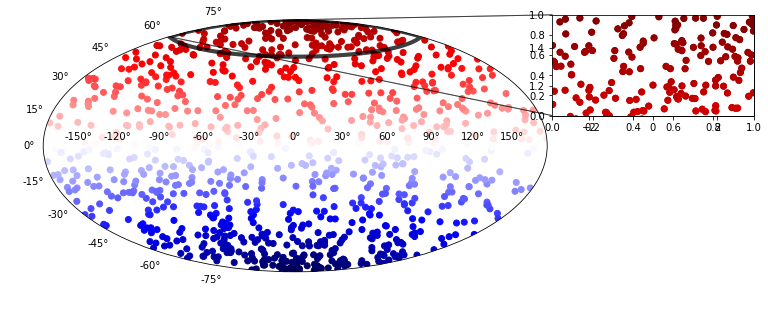

In [13]:
#Notice that the axes on the inset_axes still need to be changed, and the data replotted
proj1Z.set_xlim(np.radians(-180),np.radians(180))
proj1Z.set_ylim(np.radians(60),np.radians(90))
proj1Z.scatter(dat1,dat2,c=dat2,cmap='seismic')

#These lines will then make the inset_axes show on the main axes what it's covering
rectpatch, connectorlines = proj1.indicate_inset_zoom(proj1Z, edgecolor="black", linewidth=4)
pfig

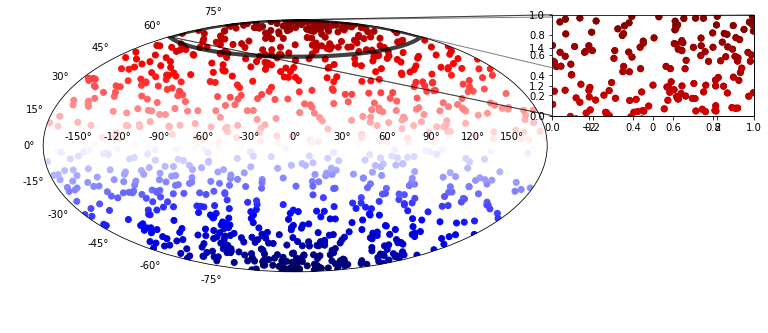

In [14]:
#By default, it doesn't show all 4 connecting lines. We can force this like below:
for i in range(4):
    connectorlines[i].set_visible(True)
pfig

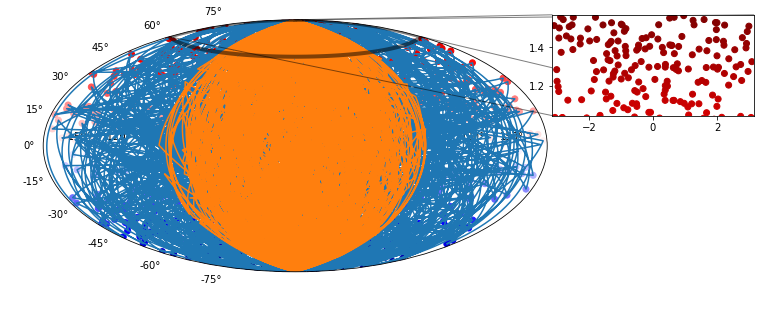

In [16]:
#Quick demonstration of saving data. Make sure you rasterize though, as if not having lots of lines like this
#can make vector images, such as pdf or eps files, take ages to save and load which is not good for papers!

# plot1 = proj1.plot(dat1,dat2)
# plot2 = proj1.plot(dat2,dat1)

plot1 = proj1.plot(dat1,dat2,rasterized=True)
plot2 = proj1.plot(dat2,dat1,rasterized=True)

# This can be really useful too as it allows you to have only plots with certain zorder get rasterized
# ax.set_rasterization_zorder(z)


pfig


In [17]:
pfig.savefig('Save1.pdf',dpi=400)
# pfig.savefig('Save1.pdf',dpi=400,rasterized=True)